In [84]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt

import os
from env import get_connection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Acquire

In [12]:
def get_zillow_data():
    '''
    This function is used to get zillow data from sql database.
    '''

    if os.path.isfile('zillow.csv'):
        return pd.read_csv('zillow.csv')
    else:
        url = get_connection('zillow')
        
        test = '%'
        
        query = (f'''
                SELECT * 
                FROM properties_2017
                LEFT JOIN airconditioningtype USING(airconditioningtypeid)
                LEFT JOIN architecturalstyletype USING(architecturalstyletypeid)
                LEFT JOIN buildingclasstype USING(buildingclasstypeid)
                LEFT JOIN heatingorsystemtype USING(heatingorsystemtypeid)
                LEFT JOIN predictions_2017 USING(parcelid)
                LEFT JOIN propertylandusetype USING(propertylandusetypeid)
                LEFT JOIN storytype USING(storytypeid)
                LEFT JOIN typeconstructiontype USING(typeconstructiontypeid)
                WHERE transactiondate LIKE ‘2017{test}{test}’
                AND latitude IS NOT NULL
                AND longitude IS NOT NULL;
                ''')
        df = pd.read_sql(query, url)
        
        df.to_csv('zillow.csv', index = False )
        
        return df    

In [49]:
df = get_zillow_data()

df.head()

,propertylandusetypeid,typeconstructiontypeid,storytypeid,airconditioningtypeid,architecturalstyletypeid,buildingclasstypeid,heatingorsystemtypeid,parcelid,id,basementsqft,...,id.1,logerror,transactiondate,heatingorsystemdesc,buildingclassdesc,architecturalstyledesc,airconditioningdesc,storydesc,typeconstructiondesc,propertylandusedesc
0,261.0,NaN,NaN,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
1,261.0,NaN,NaN,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
2,261.0,NaN,NaN,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
3,261.0,NaN,NaN,NaN,NaN,NaN,2.0,12177905,2288172,NaN,...,3,-0.103410,2017-01-01,Central,NaN,NaN,NaN,NaN,NaN,Single Family Residential
4,266.0,NaN,NaN,1.0,NaN,NaN,2.0,10887214,1970746,NaN,...,4,0.006940,2017-01-01,Central,NaN,NaN,Central,NaN,NaN,Condominium


In [22]:
df.shape

(77579, 69)

In [15]:
def drop_duplicates(df):
    
    df = df.sort_values('transactiondate')
    
    df = df[df.duplicated(subset=['parcelid'], keep = 'last') == False]
    
    return df

In [50]:
drop_duplicates(df).shape

(77381, 69)

## Data Summary 

- Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
propertylandusetypeid,77579.0,2.618245e+02,5.141596e+00,3.100000e+01,2.610000e+02,2.610000e+02,2.660000e+02,2.750000e+02
typeconstructiontypeid,223.0,6.040359e+00,5.560348e-01,4.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,1.300000e+01
storytypeid,50.0,7.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
airconditioningtypeid,25007.0,1.812013e+00,2.965768e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,207.0,7.386473e+00,2.728030e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
heatingorsystemtypeid,49571.0,3.921749e+00,3.594780e+00,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.400000e+01
parcelid,77579.0,1.300828e+07,3.519399e+06,1.071186e+07,1.153820e+07,1.253054e+07,1.421136e+07,1.676893e+08
id,77579.0,1.495392e+06,8.609686e+05,3.490000e+02,7.521420e+05,1.498227e+06,2.240879e+06,2.982274e+06
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77579 entries, 0 to 77578
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         77579 non-null  float64
 1   typeconstructiontypeid        223 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   airconditioningtypeid         25007 non-null  float64
 4   architecturalstyletypeid      207 non-null    float64
 5   buildingclasstypeid           15 non-null     float64
 6   heatingorsystemtypeid         49571 non-null  float64
 7   parcelid                      77579 non-null  int64  
 8   id                            77579 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77579 non-null  float64
 11  bedroomcnt                    77579 non-null  float64
 12  buildingqualitytypeid         49809 non-null  float64
 13  c

In [46]:
def dist_df(df):
    num_cols = df.select_dtypes(include = ('float64', 'int64'))

    for col in num_cols:
    
        plt.hist(df[col])
        plt.title(f'distribution of {col}')
        plt.xlabel(f'{col}')
        plt.show()

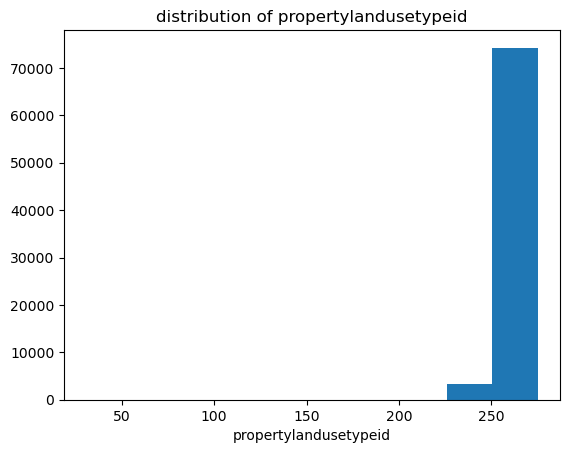

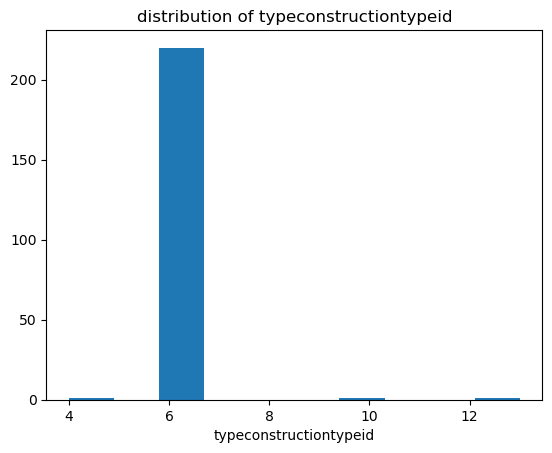

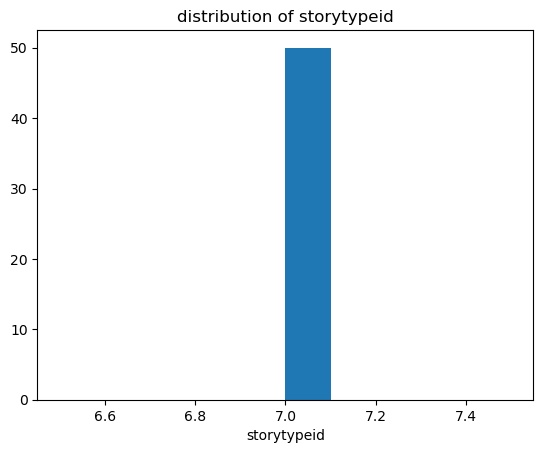

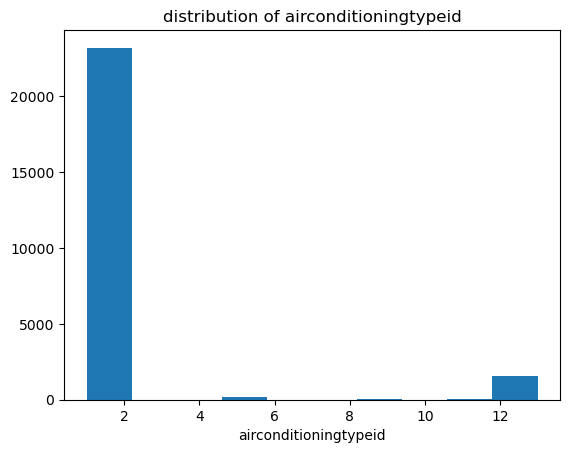

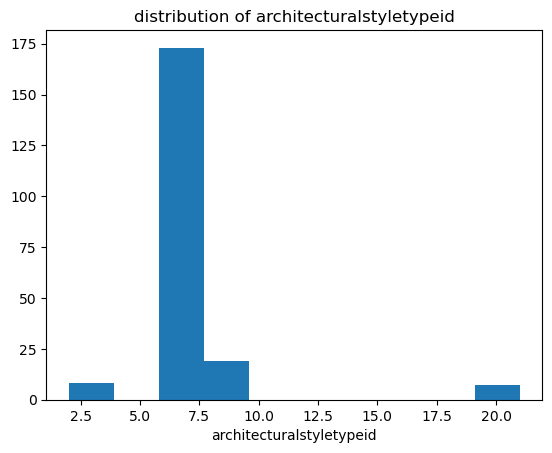

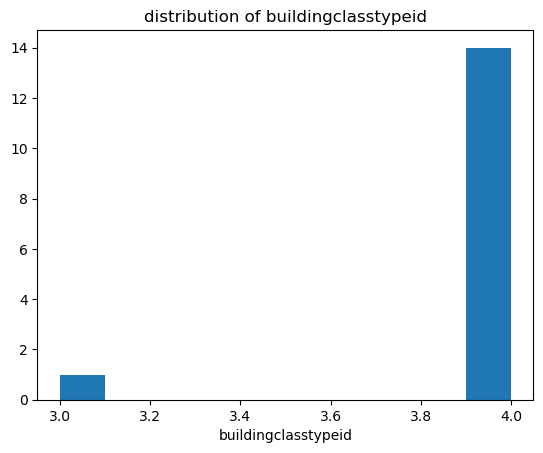

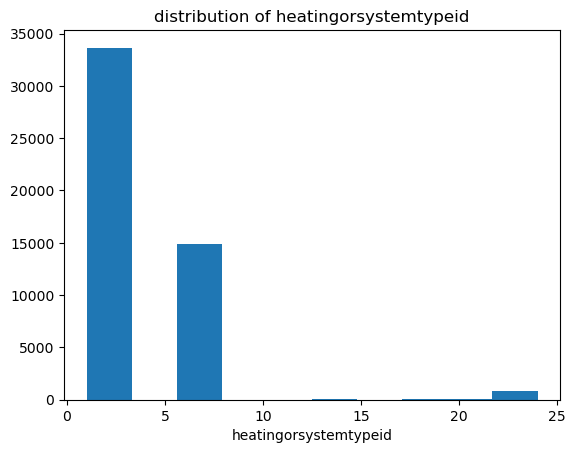

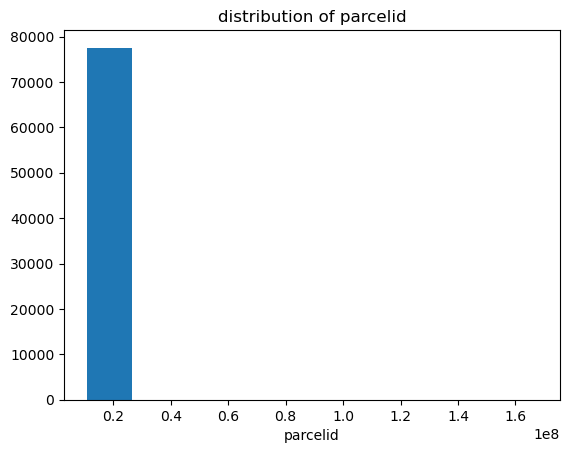

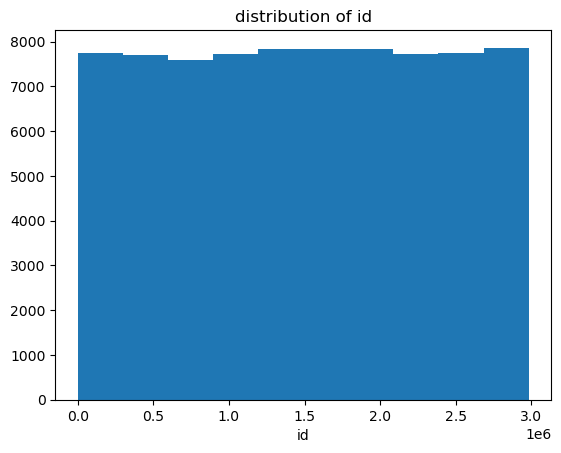

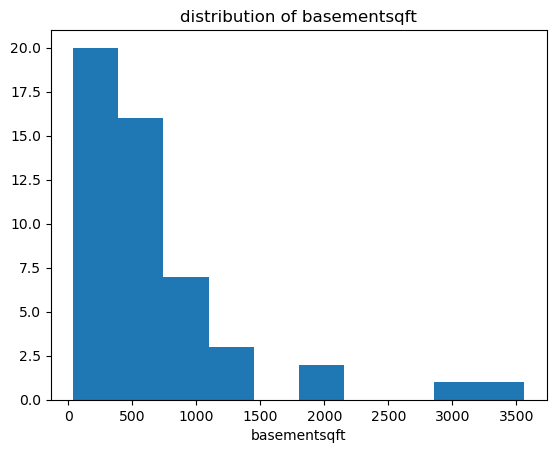

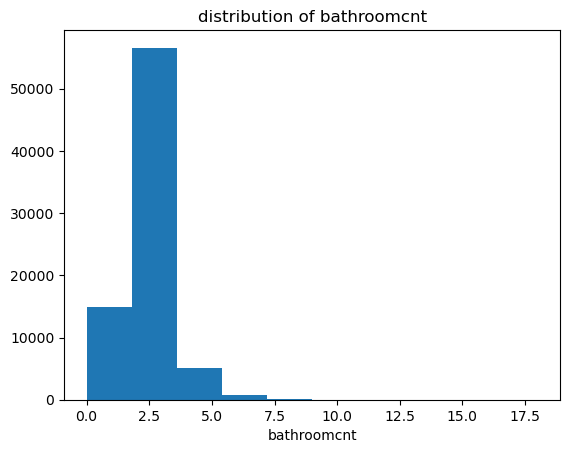

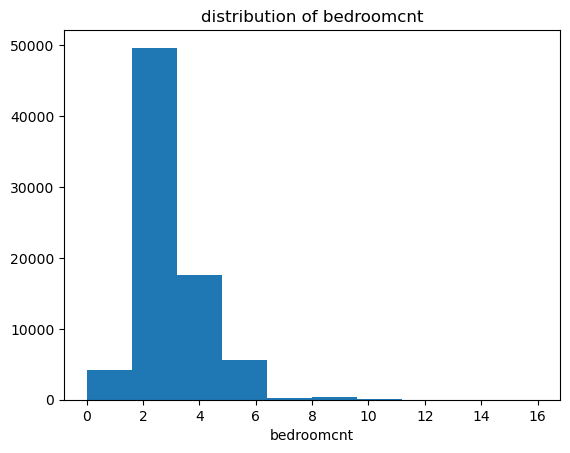

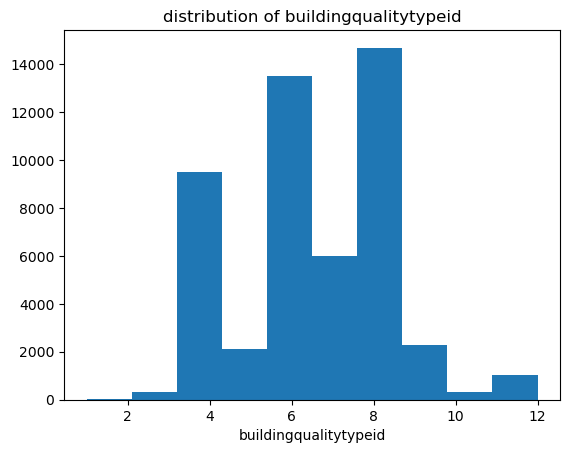

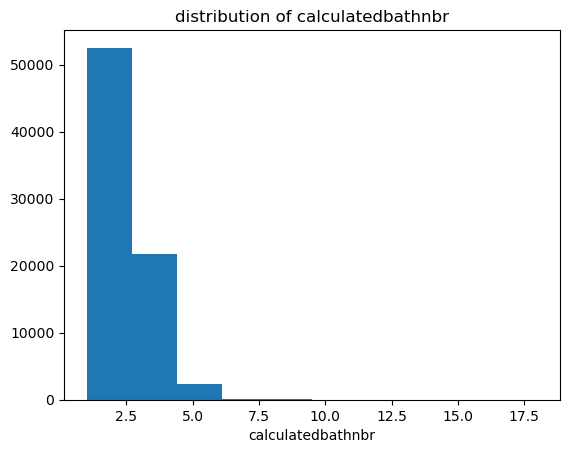

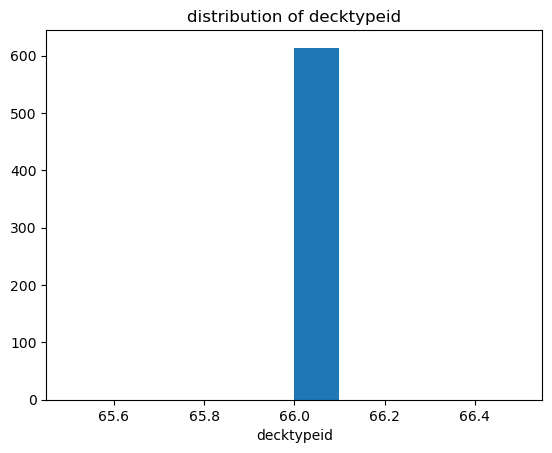

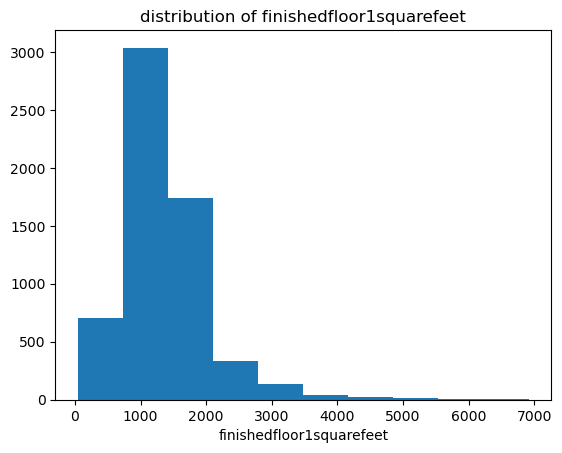

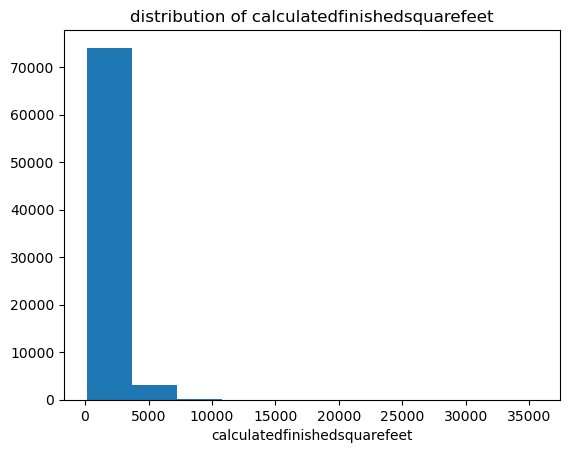

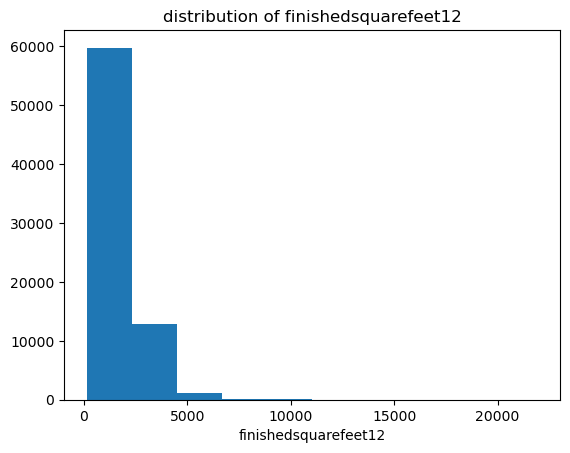

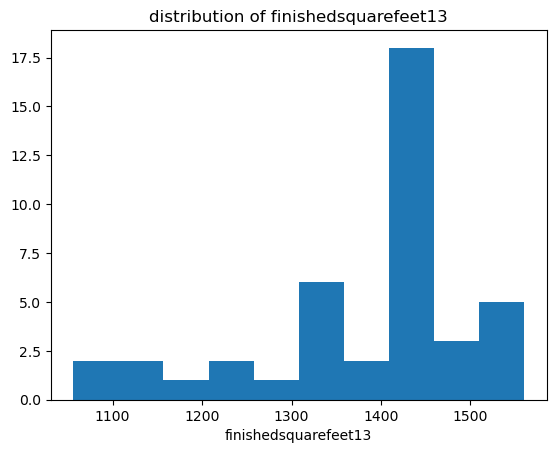

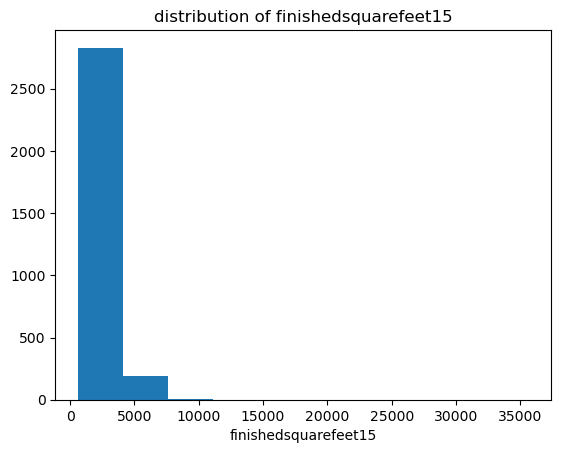

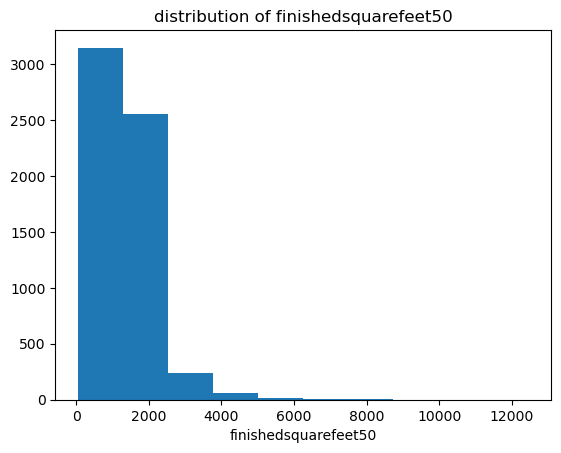

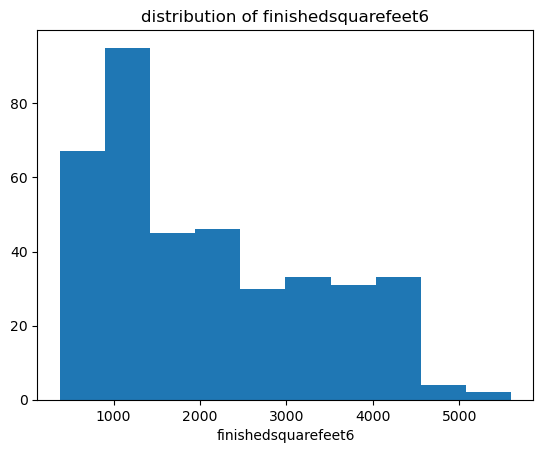

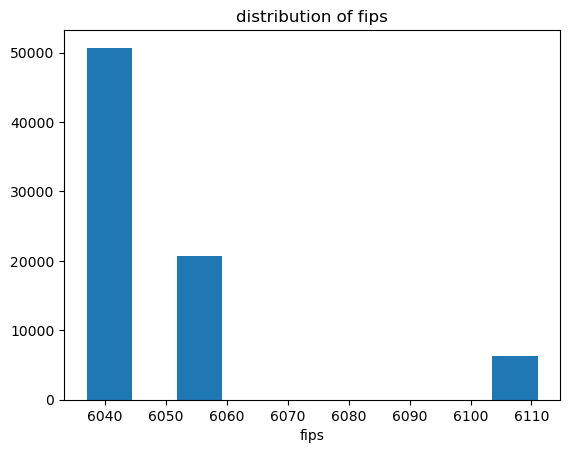

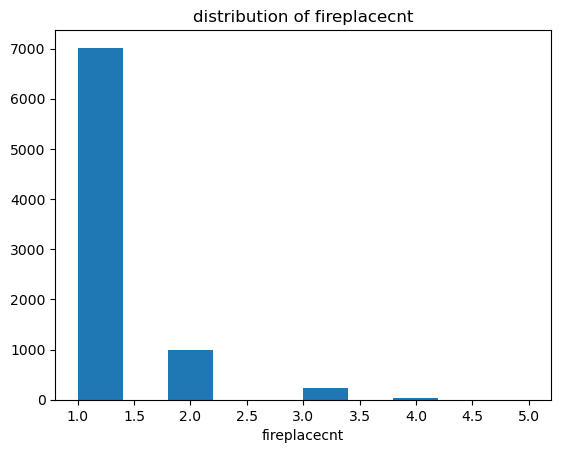

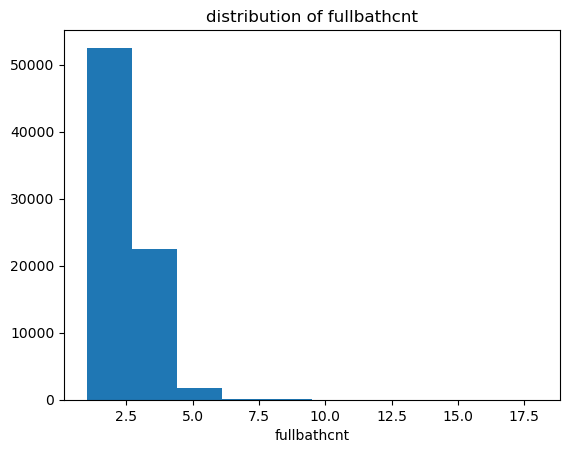

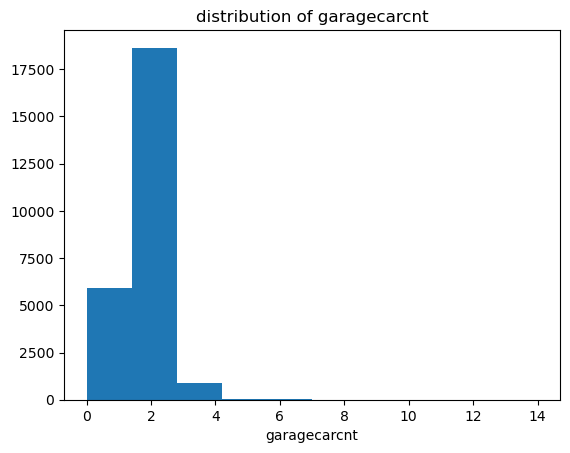

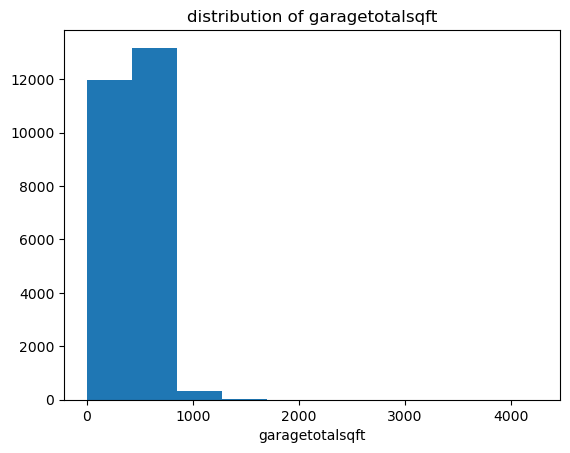

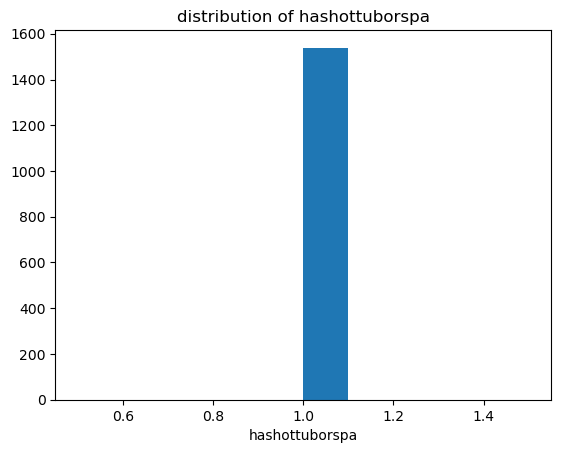

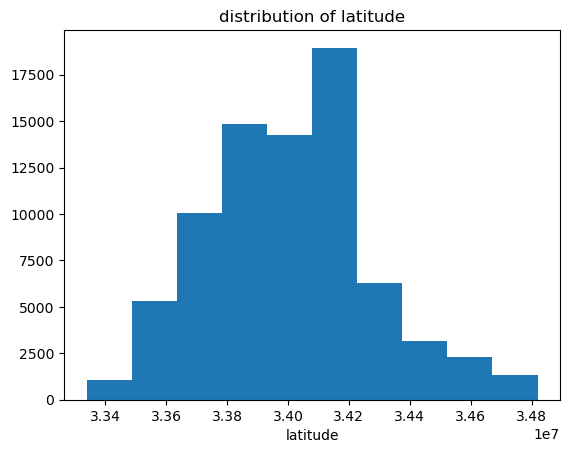

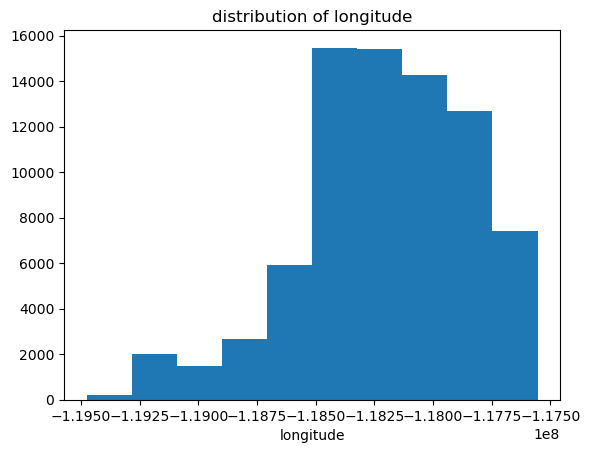

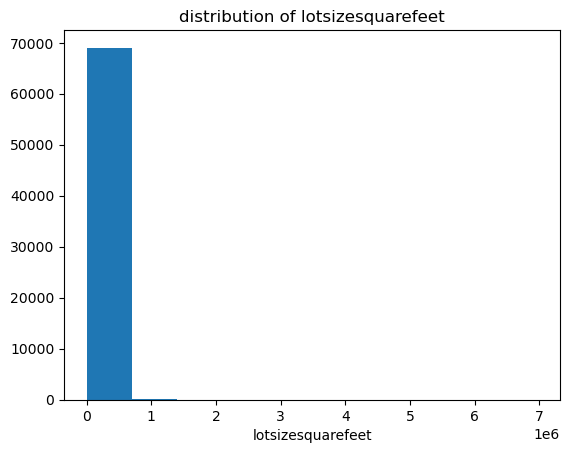

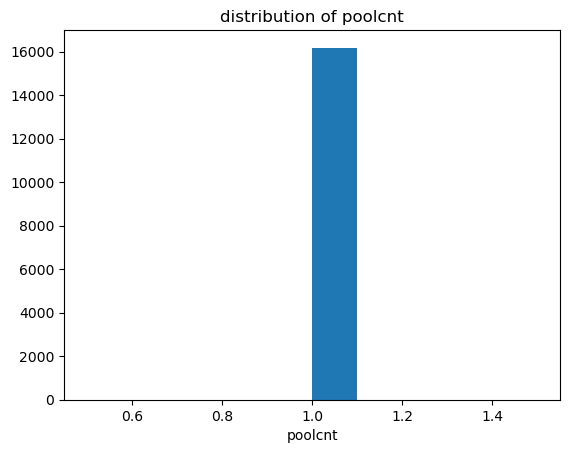

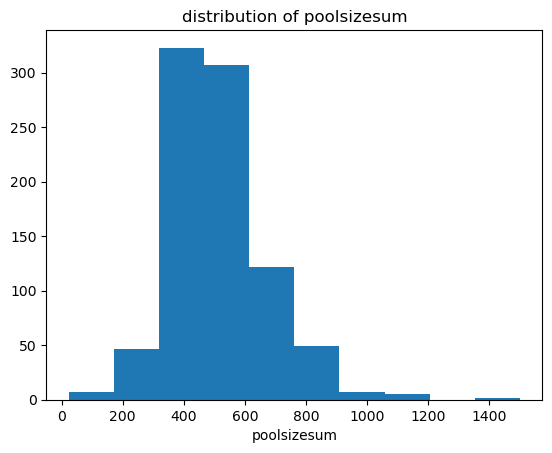

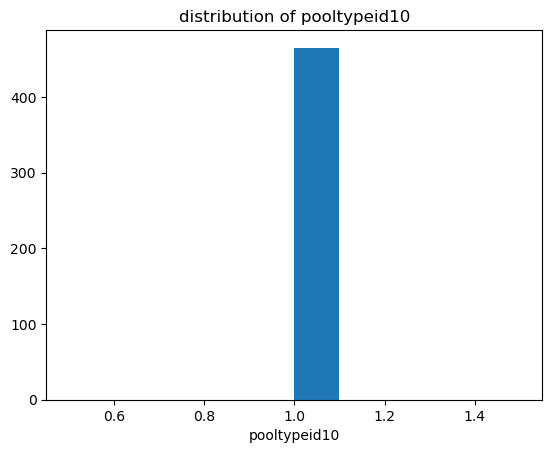

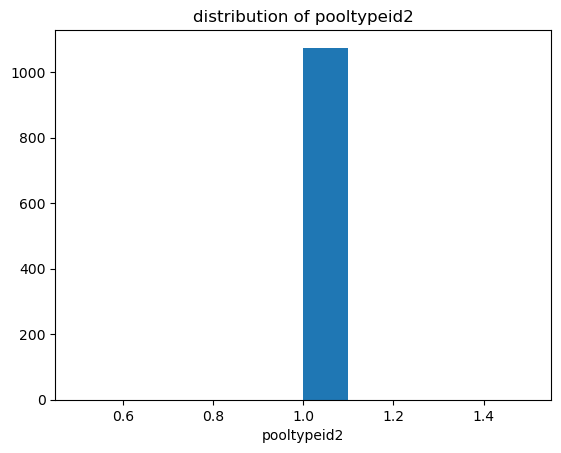

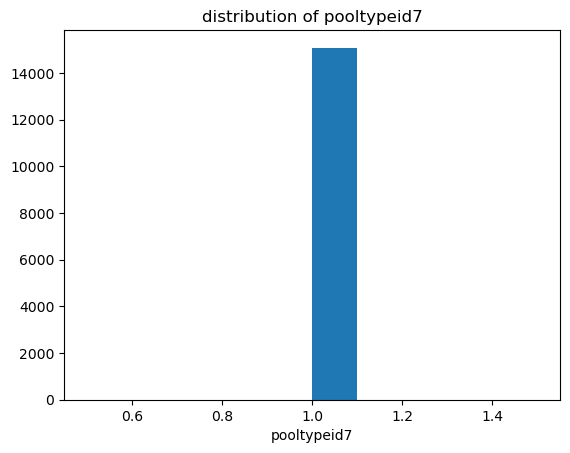

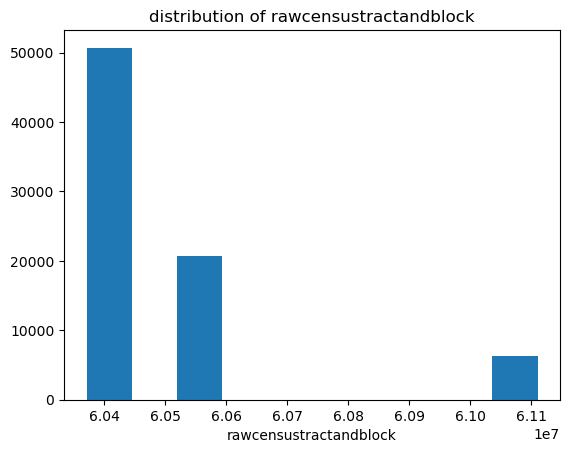

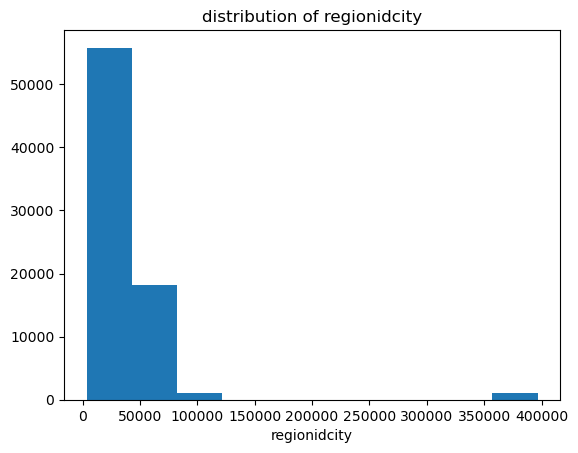

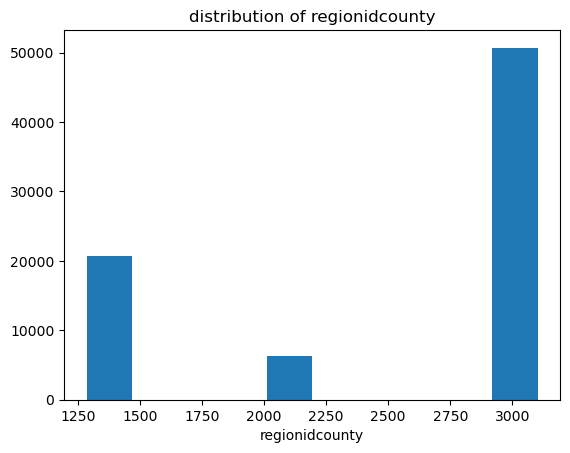

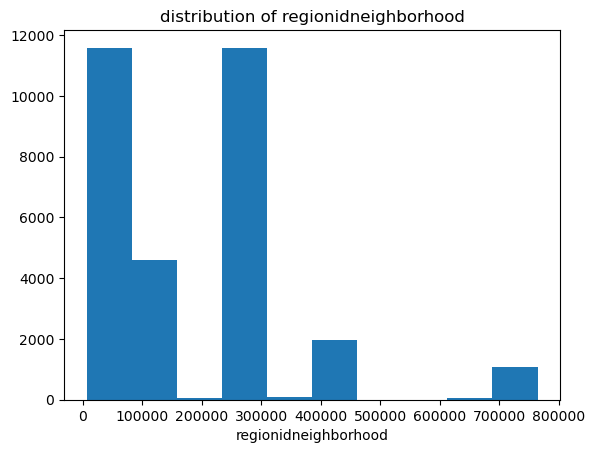

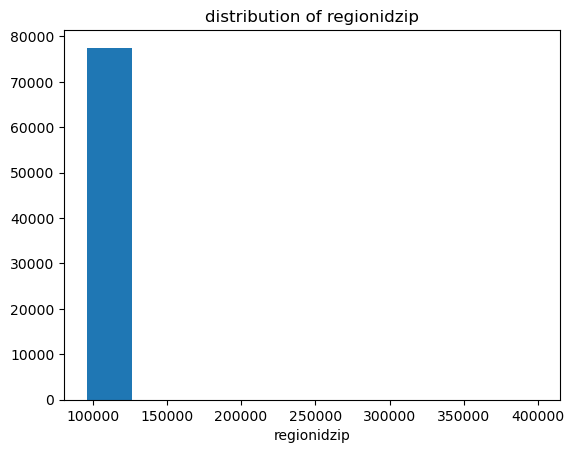

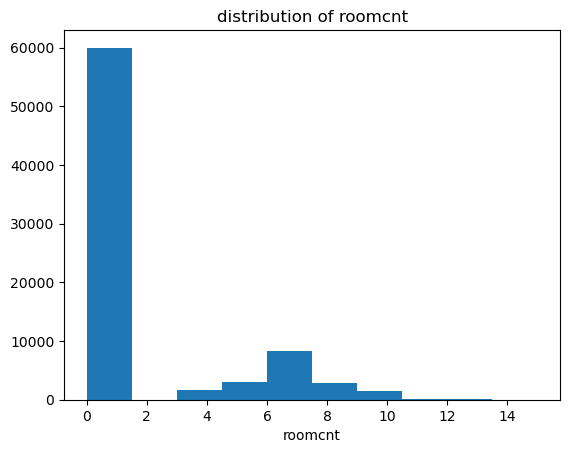

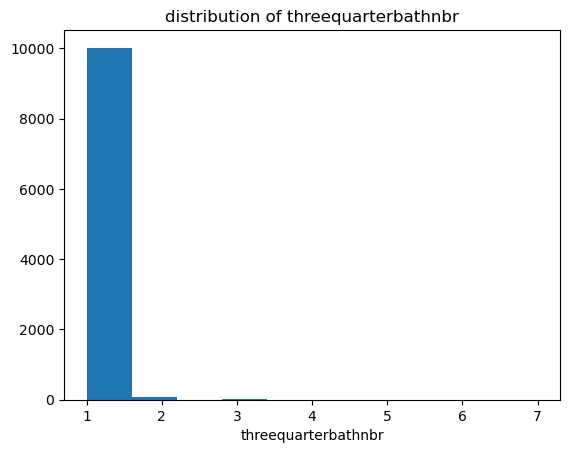

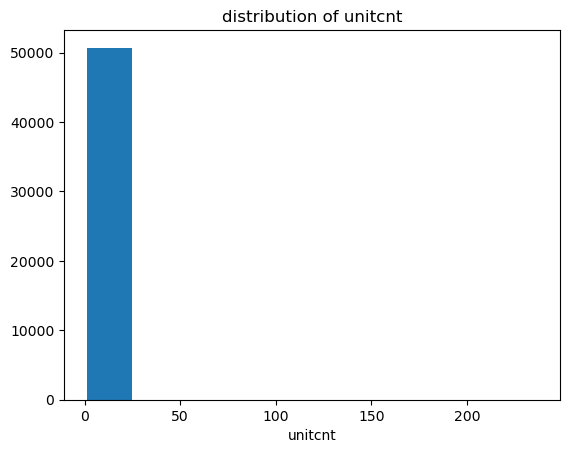

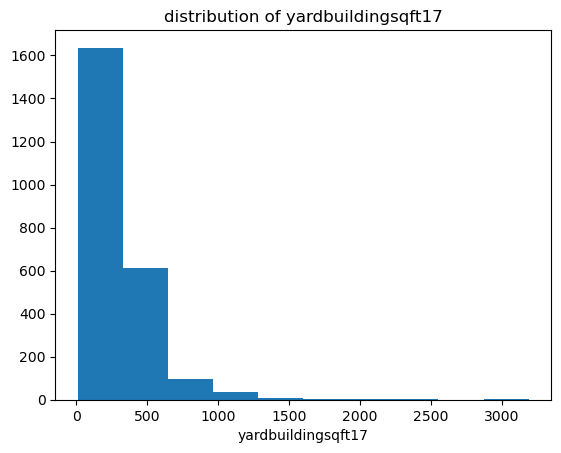

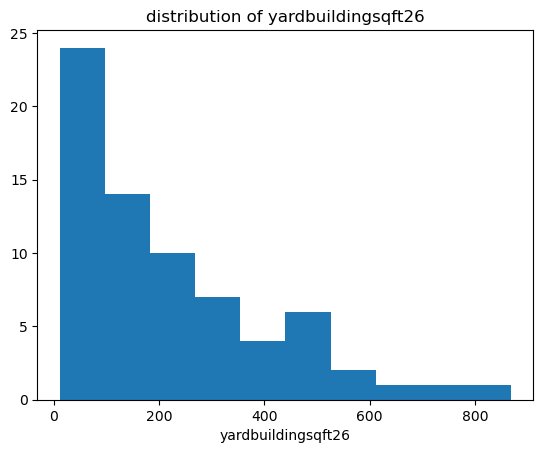

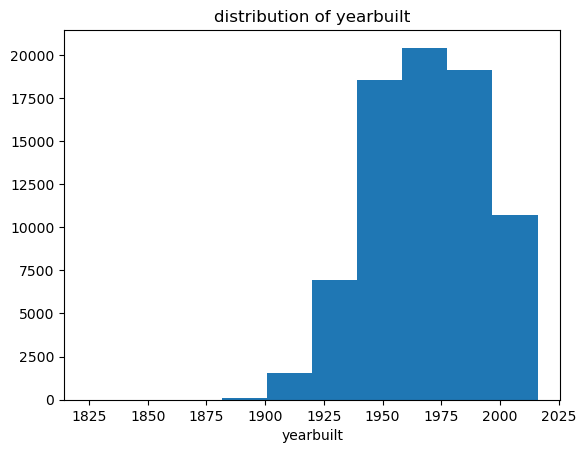

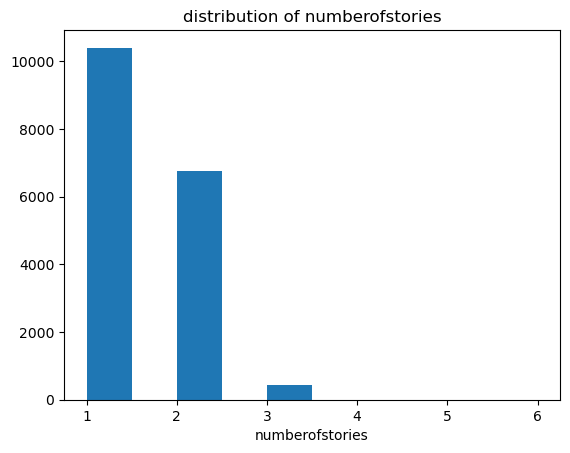

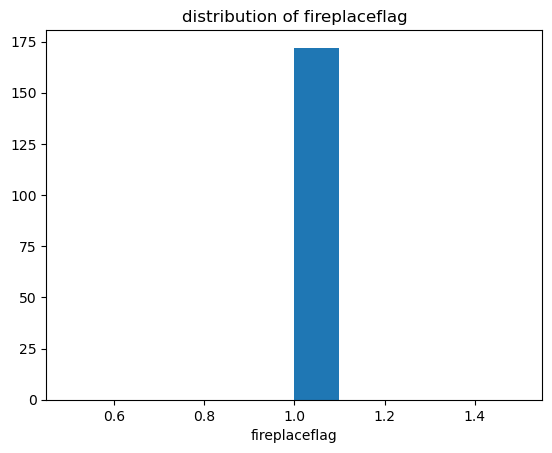

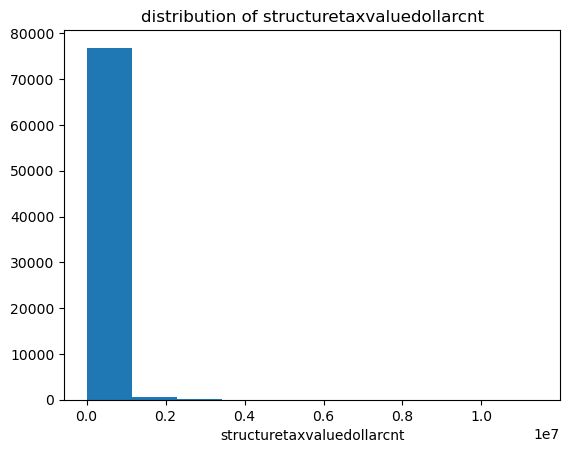

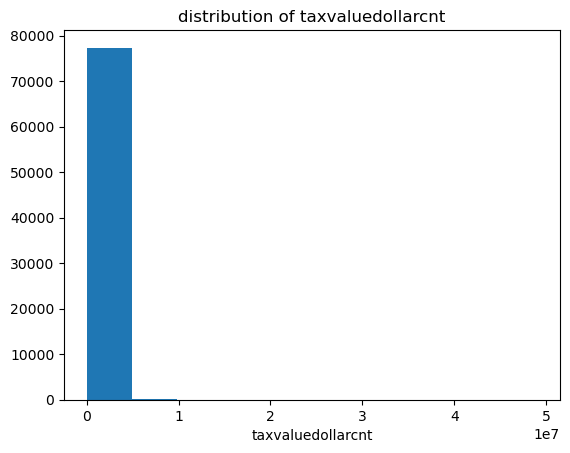

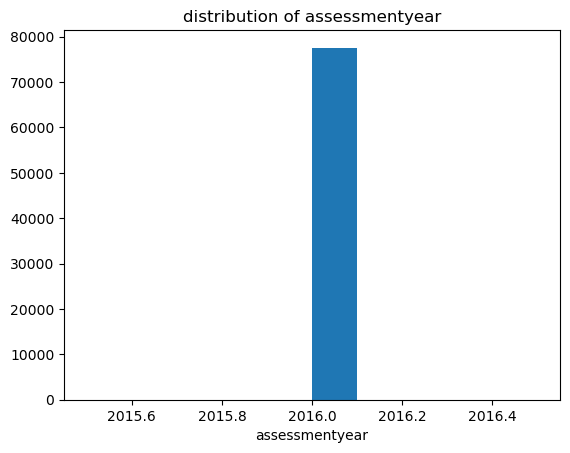

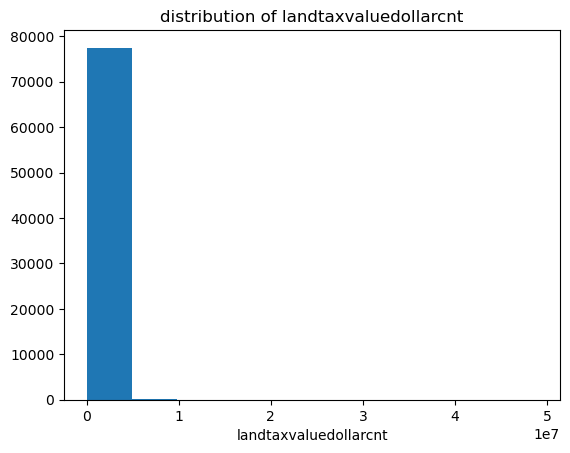

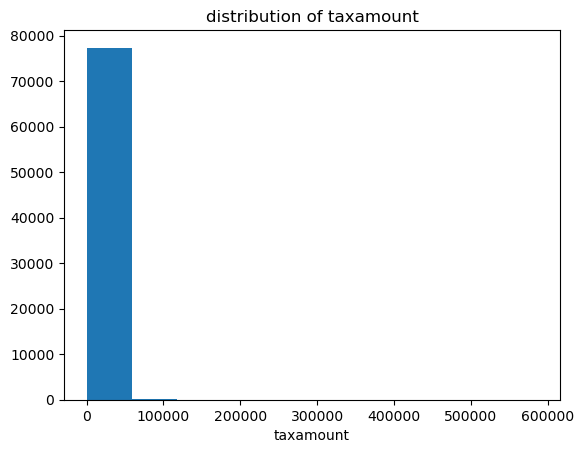

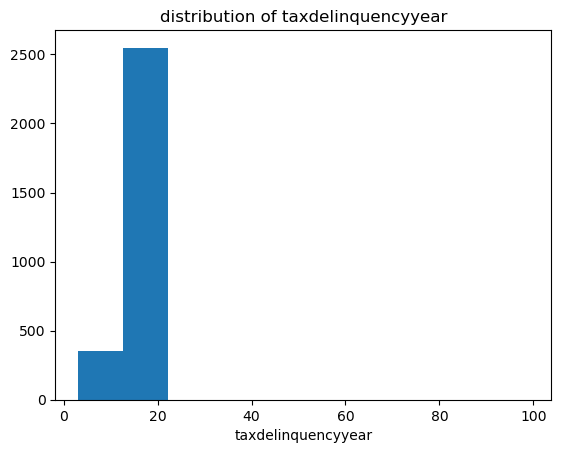

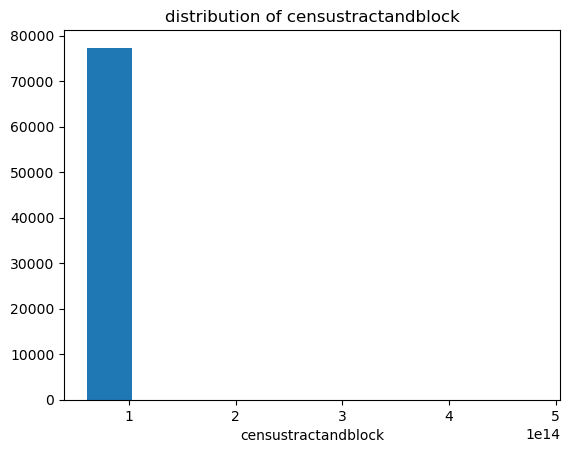

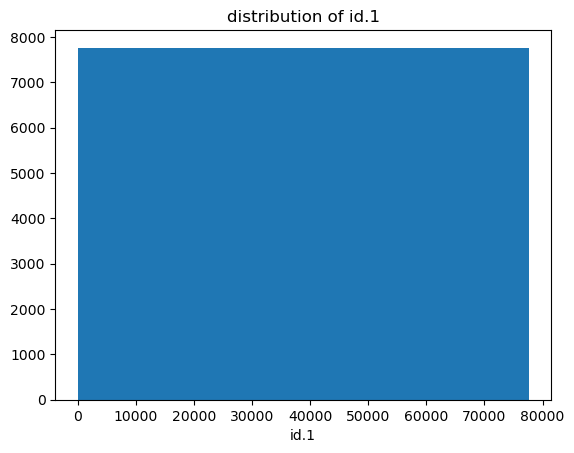

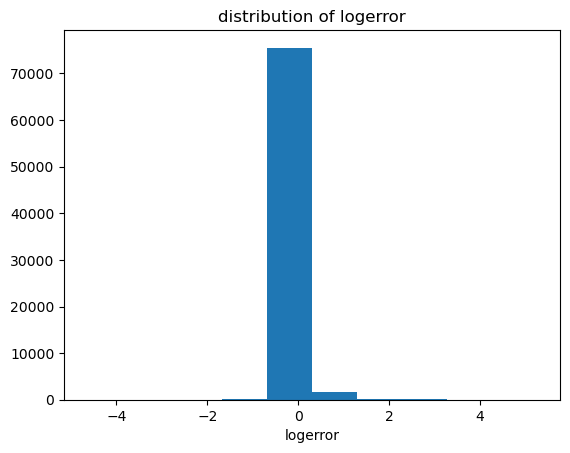

In [51]:
dist_df(df)

## Prepare

In [25]:
def missing_values(df):
    
    missing_df = pd.DataFrame(df.isna().sum(), columns=['num_rows_missing'])
    missing_df['pct_rows_missing'] = missing_df['num_rows_missing'] / len(df)
    
    return missing_df

In [26]:
missing_values(df)

,num_rows_missing,pct_rows_missing
propertylandusetypeid,0,0.000000
typeconstructiontypeid,77356,0.997126
storytypeid,77529,0.999355
airconditioningtypeid,52572,0.677658
architecturalstyletypeid,77372,0.997332
...,...,...
architecturalstyledesc,77372,0.997332
airconditioningdesc,52572,0.677658
storydesc,77529,0.999355
typeconstructiondesc,77356,0.997126


In [27]:
def sfh(df):
    sp = [261, 266, 263, 275, 264]
    df = df[df['propertylandusetypeid'].isin(sp)]
    
    return df

In [29]:
sfh(df).shape

(71922, 69)

In [30]:
def handle_missing_values(df, prop_required_col, prop_required_row):
    
    drop_cols = round(prop_required_col * len(df))
    df.dropna(thresh=drop_cols, axis=1, inplace=True)
    
    drop_rows = round(prop_required_row * len(df.columns))
    df.dropna(thresh=drop_rows, axis=0, inplace=True)
    
    return df

In [33]:
handle_missing_values(df, .6, .75).shape

(77423, 35)

## Mall Customers

- Acquire data from the customers table in the mall_customers database.
- Summarize the data (include distributions and descriptive statistics).
- Detect outliers using IQR.
- Split data into train, validate, and test.
- Encode categorical columns using a one hot encoder (pd.get_dummies).
- Handles missing values.
- Scaling

### Acquire

In [40]:
sql_url = get_connection('mall_customers')
query = '''
        SELECT *
        FROM customers
        '''

In [66]:
df = pd.read_sql(query, sql_url)

df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [81]:
def get_mall_data():
    '''
    This function is used to get zillow data from sql database.
    '''

    if os.path.isfile('mall.csv'):
        return pd.read_csv('mall.csv')
    else:
        url = get_connection('mall_customers')
        
        query = '''
                SELECT *
                FROM customers
                '''
        
     
        df = pd.read_sql(query, url)
        
        df.to_csv('mall.csv', index = False )
        
        return df    

In [168]:
df = get_mall_data()

### Data Summary 

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [170]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


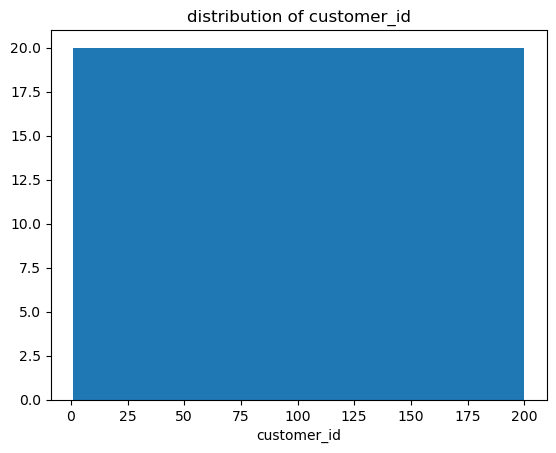

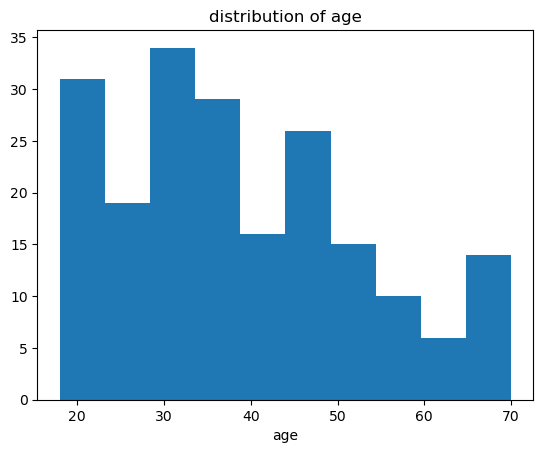

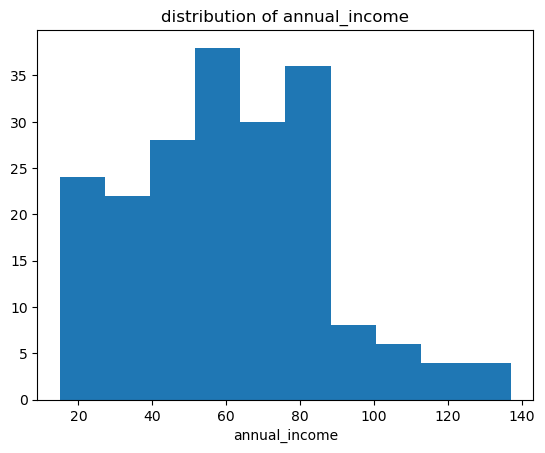

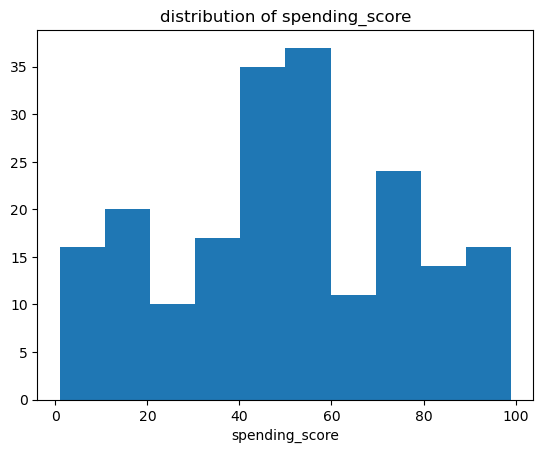

In [69]:
dist_df(df)

In [171]:
df.columns.tolist()

['customer_id', 'gender', 'age', 'annual_income', 'spending_score']

In [172]:
df['annual_income'].value_counts().sort_index()

15     2
16     2
17     2
18     2
19     4
      ..
103    4
113    2
120    2
126    2
137    2
Name: annual_income, Length: 64, dtype: int64

In [173]:
df['spending_score'].value_counts().sort_index()

1     2
3     1
4     2
5     4
6     2
     ..
94    1
95    2
97    2
98    1
99    1
Name: spending_score, Length: 84, dtype: int64

In [174]:
def find_outliers(dataframe, col, k = 1.5):
    
    '''
    Finds outliers in a dataset using the iqr method.
    '''
    
    q1, q3 = dataframe[col].quantile([.25, .75])
    
    iqr = q3 - q1
    
    upper_bound = q3 + k * iqr
    
    lower_bound = q1 - k * iqr
    
    return print(f' For {col} the lower bound is {lower_bound} and the upper bound is {upper_bound}')

In [175]:
find_outliers(df, 'annual_income')

 For annual_income the lower bound is -13.25 and the upper bound is 132.75


In [176]:
num_df = df.select_dtypes(exclude = object)
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     200 non-null    int64
 1   age             200 non-null    int64
 2   annual_income   200 non-null    int64
 3   spending_score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [177]:
disc_df = df.select_dtypes(include = ('object'))
disc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [179]:
cols = num_df.columns.tolist()

for col in cols:
    find_outliers(num_df, col)

 For customer_id the lower bound is -98.5 and the upper bound is 299.5
 For age the lower bound is -1.625 and the upper bound is 79.375
 For annual_income the lower bound is -13.25 and the upper bound is 132.75
 For spending_score the lower bound is -22.625 and the upper bound is 130.375


In [180]:
df.shape

(200, 5)

In [142]:
df = pd.get_dummies(df, columns = ['gender'])

df.head()

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [187]:
def train_val_test(df, stratify = None):
    seed = 22
    
    ''' This function is a general function to split our data into our train, validate, and test datasets. We put in a dataframe
    and our target variable to then return us the datasets of train, validate and test.'''
    
    train, test = train_test_split(df, train_size = 0.7, random_state = seed, stratify = None)
    
    validate, test = train_test_split(test, train_size = 0.5, random_state = seed, stratify = None)
    
    return train, validate, test

In [188]:
train, validate, test = train_val_test(df)

train.shape, validate.shape, test.shape

((140, 5), (30, 5), (30, 5))

In [150]:
train.isna().sum()

customer_id       0
age               0
annual_income     0
spending_score    0
gender_Female     0
gender_Male       0
dtype: int64

In [151]:
def mvp_scaled_data(train, 
               validate, 
               test, 
               columns_to_scale = ['age', 'annual_income'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    mms = MinMaxScaler()
    #     fit the thing
    mms.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(mms.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(mms.transform(validate[columns_to_scale]), 
                                                     columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(mms.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [154]:
train_scaled, validate_scaled, test_scaled =  mvp_scaled_data(train, validate, test)

train_scaled.shape, validate_scaled.shape, test_scaled.shape

((140, 6), (30, 6), (30, 6))

In [155]:
train_scaled

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
197,198,0.269231,0.909836,74,0,1
2,3,0.038462,0.008197,6,1,0
54,55,0.615385,0.229508,45,1,0
118,119,0.634615,0.426230,43,1,0
181,182,0.269231,0.672131,86,1,0
...,...,...,...,...,...,...
100,101,0.096154,0.385246,41,1,0
192,193,0.288462,0.803279,8,0,1
44,45,0.596154,0.196721,28,1,0
132,133,0.134615,0.467213,34,1,0
